# Simulate the Climbing Game

In [1]:
from environment import ClimbingGame
from agent import RandomAgent, QLearner
from HystereticQLearner import HystereticQLearner
from boltzmann import selection as boltzmann_policy
from utils import simulate_task, find_greedy_action_for_state
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed()

## Test Bed

In [22]:
# Simulate
## Parameters

exploration_rate = None
def discount_rate(_): return 0
def learning_rate(_): return 0.1
def decrease_rate(_): return 0.01

temperature_start = None  # Replace T = num with T = temperature_start maybe?
timesteps = 3000
num_simulations = 500

In [3]:
rewards = {}

## Climbing Game Normal

In [4]:
# Simulate
## Parameters

num_converge = 0
rewards_temp = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
    task = ClimbingGame()

    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")
    agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
    agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards_temp[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")
    joint_action = [find_greedy_action_for_state(agent, 0) for agent in [agent1, agent2]]
    if(joint_action == ['A', 'A']):
        num_converge += 1

rewards["deterministic"] = rewards_temp
print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))

#------------------------#
| Simulation 0          |
#------------------------#


/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


#------------------------#
| Simulation 1          |
#------------------------#
#------------------------#
| Simulation 2          |
#------------------------#
#------------------------#
| Simulation 3          |
#------------------------#
#------------------------#
| Simulation 4          |
#------------------------#
#------------------------#
| Simulation 5          |
#------------------------#
#------------------------#
| Simulation 6          |
#------------------------#
#------------------------#
| Simulation 7          |
#------------------------#
#------------------------#
| Simulation 8          |
#------------------------#
#------------------------#
| Simulation 9          |
#------------------------#
#------------------------#
| Simulation 10          |
#------------------------#
#------------------------#
| Simulation 11          |
#------------------------#
#------------------------#
| Simulation 12          |
#------------------------#
#------------------------#
| Simulati

#------------------------#
| Simulation 103          |
#------------------------#
#------------------------#
| Simulation 104          |
#------------------------#
#------------------------#
| Simulation 105          |
#------------------------#
#------------------------#
| Simulation 106          |
#------------------------#
#------------------------#
| Simulation 107          |
#------------------------#
#------------------------#
| Simulation 108          |
#------------------------#
#------------------------#
| Simulation 109          |
#------------------------#
#------------------------#
| Simulation 110          |
#------------------------#
#------------------------#
| Simulation 111          |
#------------------------#
#------------------------#
| Simulation 112          |
#------------------------#
#------------------------#
| Simulation 113          |
#------------------------#
#------------------------#
| Simulation 114          |
#------------------------#
#---------------

#------------------------#
| Simulation 203          |
#------------------------#
#------------------------#
| Simulation 204          |
#------------------------#
#------------------------#
| Simulation 205          |
#------------------------#
#------------------------#
| Simulation 206          |
#------------------------#
#------------------------#
| Simulation 207          |
#------------------------#
#------------------------#
| Simulation 208          |
#------------------------#
#------------------------#
| Simulation 209          |
#------------------------#
#------------------------#
| Simulation 210          |
#------------------------#
#------------------------#
| Simulation 211          |
#------------------------#
#------------------------#
| Simulation 212          |
#------------------------#
#------------------------#
| Simulation 213          |
#------------------------#
#------------------------#
| Simulation 214          |
#------------------------#
#---------------

#------------------------#
| Simulation 303          |
#------------------------#
#------------------------#
| Simulation 304          |
#------------------------#
#------------------------#
| Simulation 305          |
#------------------------#
#------------------------#
| Simulation 306          |
#------------------------#
#------------------------#
| Simulation 307          |
#------------------------#
#------------------------#
| Simulation 308          |
#------------------------#
#------------------------#
| Simulation 309          |
#------------------------#
#------------------------#
| Simulation 310          |
#------------------------#
#------------------------#
| Simulation 311          |
#------------------------#
#------------------------#
| Simulation 312          |
#------------------------#
#------------------------#
| Simulation 313          |
#------------------------#
#------------------------#
| Simulation 314          |
#------------------------#
#---------------

#------------------------#
| Simulation 403          |
#------------------------#
#------------------------#
| Simulation 404          |
#------------------------#
#------------------------#
| Simulation 405          |
#------------------------#
#------------------------#
| Simulation 406          |
#------------------------#
#------------------------#
| Simulation 407          |
#------------------------#
#------------------------#
| Simulation 408          |
#------------------------#
#------------------------#
| Simulation 409          |
#------------------------#
#------------------------#
| Simulation 410          |
#------------------------#
#------------------------#
| Simulation 411          |
#------------------------#
#------------------------#
| Simulation 412          |
#------------------------#
#------------------------#
| Simulation 413          |
#------------------------#
#------------------------#
| Simulation 414          |
#------------------------#
#---------------

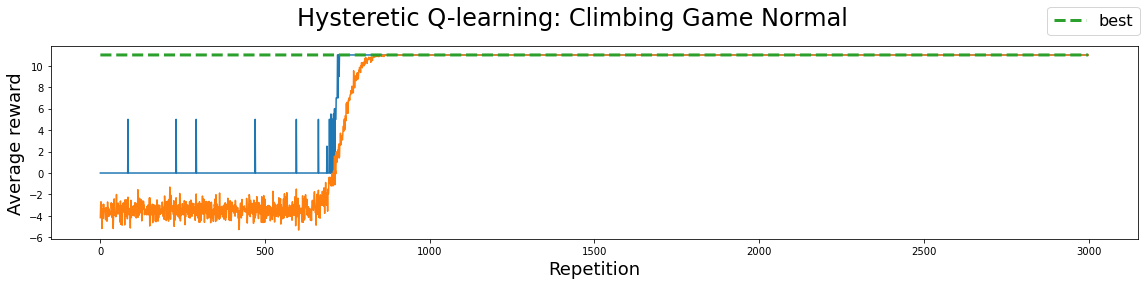

In [5]:
fig = plt.figure(figsize=(16,4))

plt.plot(range(timesteps), np.median(rewards["deterministic"], axis=0))
plt.plot(range(timesteps), np.average(rewards["deterministic"], axis=0))
plt.plot(range(timesteps), np.repeat(11, timesteps), '--', lw=3, label='best')

fig.legend(fontsize=16)
fig.suptitle('Hysteretic Q-learning: Climbing Game Normal', fontsize=24)
plt.xlabel('Repetition', fontsize=18)
plt.ylabel('Average reward', fontsize=18)
plt.tight_layout()

## Climbing Game Part Stochastic

In [6]:
# Simulate
## Parameters
num_converge = 0


rewards_temp = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")
    task = ClimbingGame(part_stochastic=True)

    agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
    agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)


    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards_temp[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")
    joint_action = [find_greedy_action_for_state(agent, 0) for agent in [agent1, agent2]]
    if(joint_action == ['A', 'A']):
        num_converge += 1
    
rewards["part stochastic"] = rewards_temp
print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))

/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


Percentage of simulations converged: 77.8%


In [7]:
rewards["part stochastic"]

array([[  5.,   5.,   0., ...,  11.,  11.,  11.],
       [  0.,  11., -30., ...,  14.,  14.,  14.],
       [  0., -30.,   6., ...,  11.,  11.,  11.],
       ...,
       [  0.,   0.,   6., ...,  11.,  11.,  11.],
       [ 14.,   0.,   0., ...,  11.,  11.,  11.],
       [  0.,  14.,   6., ...,  11.,  11.,  11.]])

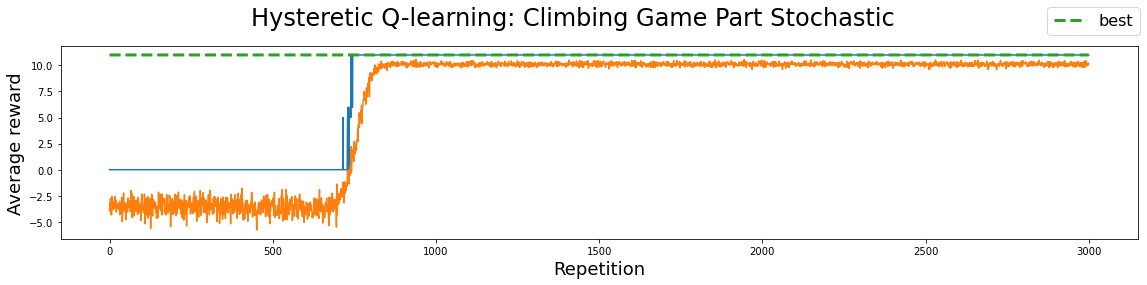

In [8]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(timesteps), np.median(rewards["part stochastic"], axis=0))
plt.plot(range(timesteps), np.average(rewards["part stochastic"], axis=0))
plt.plot(range(timesteps), np.repeat(11, timesteps), '--', lw=3, label='best')

fig.suptitle('Hysteretic Q-learning: Climbing Game Part Stochastic', fontsize=24)
plt.xlabel('Repetition', fontsize=18)
plt.ylabel('Average reward', fontsize=18)
fig.legend(fontsize=16)
plt.tight_layout()

## Climbing Game Full Stochastic

In [9]:
# Simulate
## Parameters
num_converge = 0
rewards_temp = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
#     print("#------------------------#")
#     print("| Simulation {}          |".format(i))
#     print("#------------------------#")
    task = ClimbingGame(full_stochastic=True)

    agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
    agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

    T = 5000
    t = 0
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards_temp[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")
    joint_action = [find_greedy_action_for_state(agent, 0) for agent in [agent1, agent2]]
    if(joint_action == ['A', 'A']):
        num_converge += 1

rewards["full stochastic"] = rewards_temp
print("Percentage of simulations converged: {}%".format(num_converge / num_simulations * 100))

/home/davin/Documents/GitHub/hysteretic-q-learning/boltzmann.py:13: RuntimeWarning: overflow encountered in double_scalars
  if e**(x/T) == np.Infinity and x > highInf:


Percentage of simulations converged: 1.2%


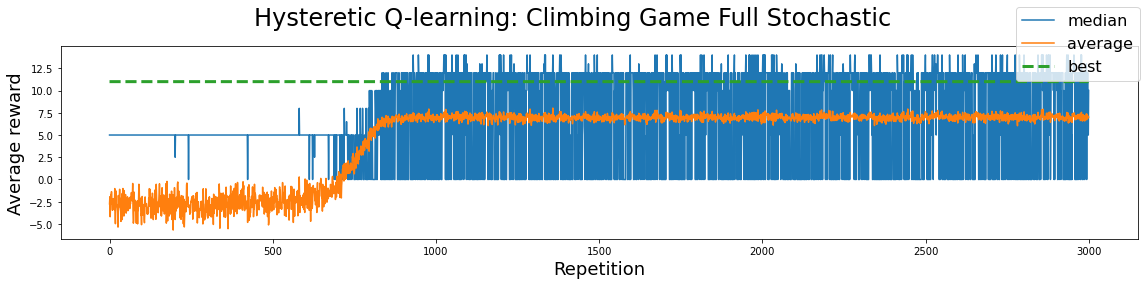

In [10]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(timesteps), np.median(rewards["full stochastic"], axis=0), label='median')
plt.plot(range(timesteps), np.average(rewards["full stochastic"], axis=0), label='average')
plt.plot(range(timesteps), np.repeat(11, timesteps), '--', lw=3, label='best')

fig.suptitle('Hysteretic Q-learning: Climbing Game Full Stochastic', fontsize=24)
plt.xlabel('Repetition', fontsize=18)
plt.ylabel('Average reward', fontsize=18)
fig.legend(fontsize=16)
plt.tight_layout()

## Random agent

In [26]:
import numpy as np
random_rewards = {}
random_rewards["deterministic"] = {}
random_rewards["full stochastic"] = {}
random_rewards["part stochastic"] = {}
keys = ["deterministic", "part stochastic", "full stochastic"]

for key in keys:
    rewards_temp = np.zeros((num_simulations, timesteps))

    for i in range(num_simulations):
        if(key == "full stochastic"):
            taskfull_stochastic=astic=ClimbingGame(full_stochastic=True)
        elif(key == "part stochastic"):
            task = ClimbingGame(part_stochastic=True)
        else:
            task = ClimbingGame()

        agents = [RandomAgent(task),
              RandomAgent(task)]
    #     print("#------------------------#")
    #     print("| Simulation {}          |".format(i))
    #     print("#------------------------#")

        t = 0
        for j in range(timesteps):
            t, _ = simulate_task(agents, task, t, None, timesteps=timesteps)
            rewards_temp[i][j] = agents[0].accumulated_reward
            agents[0].accumulated_reward = 0

    random_rewards[key] = rewards_temp

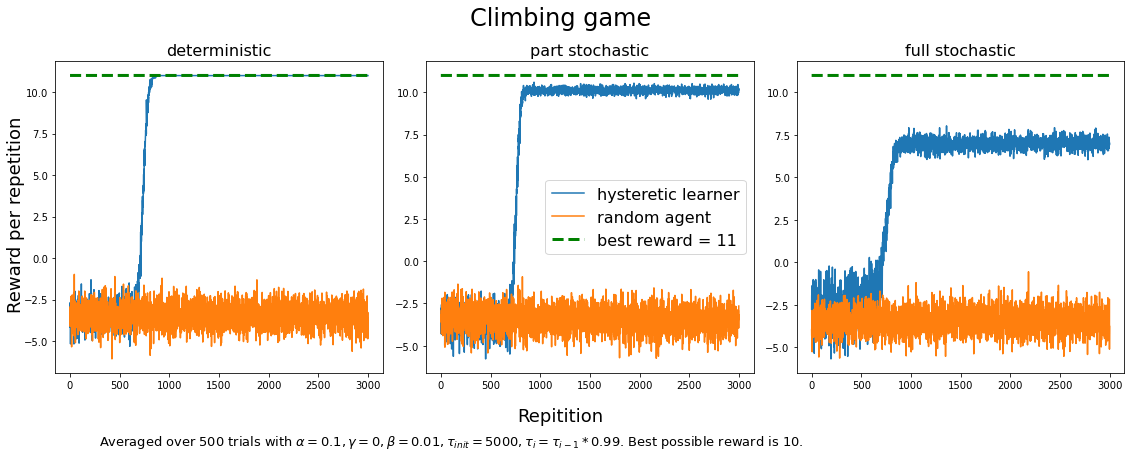

In [32]:
# fig = plt.figure(figsize=(16,6))
keys = ['deterministic', 'part stochastic', 'full stochastic']
fig, axs = plt.subplots(1, 3, figsize=(16, 6) )

for j in range(len(keys)):
    key = keys[j]
    ax = axs[j]

    x = np.array(range(3000))
    # for data in rewards[key]["k=0"]:
    # # data = rewards["deterministic"]["k=0"]
    #     plt.plot(x, data, alpha=0.1, color='orange')
    ax.plot(x, np.mean(rewards[key], axis=0), label='hysteretic learner')
    ax.plot(range(3000), np.average(random_rewards[key], axis=0), label='random agent')
    ax.plot(range(3000), np.repeat(11, 3000), '--', lw=3, label='best reward = 11', color='green')
    ax.set_title(key, fontsize=16)

    if(j == 1):
        ax.legend(fontsize=16, loc='best')

    # plt.plot(range(5000), np.repeat(7.62, 5000), '--', lw=3, label='line', color='green')

fig.suptitle('Climbing game', fontsize=24)
fig.supxlabel('Repitition', fontsize=18)
fig.supylabel('Reward per repetition', fontsize=18)
parameters_text = r'$\alpha = 0.1,\gamma=0, \beta=0.01, \tau_{init}=5000, \tau_i = \tau_{i-1} * 0.99$'

plt.figtext(0.1, -0.035,s="Averaged over 500 trials with {}. Best possible reward is 10.".format(parameters_text), fontsize=13)

fig.tight_layout()

# plt.ylim(-30, 12)

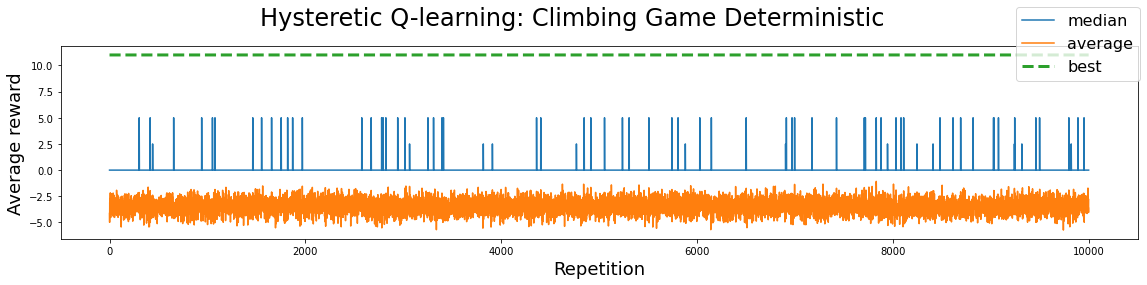

In [20]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(timesteps), np.median(random_rewards['deterministic'], axis=0), label='median')
plt.plot(range(timesteps), np.average(random_rewards['deterministic'], axis=0), label='average')
plt.plot(range(timesteps), np.repeat(11, timesteps), '--', lw=3, label='best')

fig.suptitle('Hysteretic Q-learning: Climbing Game Deterministic', fontsize=24)
plt.xlabel('Repetition', fontsize=18)
plt.ylabel('Average reward', fontsize=18)
fig.legend(fontsize=16)
plt.tight_layout()

## Decentralized Q-learning

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

q_learners = (QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy), QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy))

num_games = 1263
num_simulations = 1
q_learn_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(q_learners, task, t, T)
        q_learn_rewards[i][t - 1] = q_learners[0].accumulated_reward
        q_learners[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(q_learn_rewards, axis=0))
plt.plot(range(num_games), np.average(q_learn_rewards, axis=0))
fig.suptitle('Decentralized Q-Learning', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
# Simulate
## Parameters

task = ClimbingGame()

agent1 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)
agent2 = HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy)

rewards = np.zeros((num_simulations, timesteps))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < timesteps):
        t, T = simulate_task([agent1, agent2], task, t, T, timesteps=timesteps)
        rewards[i][t - 1] = agent1.accumulated_reward
        agent1.accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(rewards, axis=0))
plt.plot(range(timesteps), np.average(rewards, axis=0))
fig.suptitle('Hysteretic Q-learning', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

random_agents = (RandomAgent(task), RandomAgent(task))

num_games = 1263
num_simulations = 500
random_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(random_agents, task, t)
        random_rewards[i][t - 1] = random_agents[0].accumulated_reward
        random_agents[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(random_rewards, axis=0))
plt.plot(range(num_games), np.average(random_rewards, axis=0))
fig.suptitle('Random agent', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

q_learners = (QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy), QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy))

num_games = 1263
num_simulations = 1
q_learn_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(q_learners, task, t, T)
        q_learn_rewards[i][t - 1] = q_learners[0].accumulated_reward
        q_learners[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
# plt.plot(range(num_games), np.median(q_learn_rewards, axis=0))
plt.plot(range(num_games), np.average(q_learn_rewards, axis=0))
fig.suptitle('Decentralized Q-Learning', fontsize=20)
plt.ylabel('Average reward')

## Test with a "dumb" agent

In [ ]:
from agent import FixedAgent

task = ClimbingGame()


import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

agents = (HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, policy=boltzmann_policy), 
          FixedAgent(task, 'A'))

num_games = 1263
num_simulations = 500
base_line_rewards = np.zeros((num_simulations, num_games))



for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")
    T = 5000
    t = 0
    while(t < num_games):
            t, T = simulate_task(agents, task, t, T)
            base_line_rewards[i][t - 1] = agents[0].accumulated_reward
            agents[0].accumulated_reward = 0

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(num_games), np.average(base_line_rewards, axis=0))
fig.suptitle('Hysteretic with Dummy agent', fontsize=20)
plt.ylabel('Average reward')

In [ ]:
import numpy as np
# Simulate
## Parameters

exploration_rate = None
discount_rate = lambda _: 0
learning_rate = lambda _: 0.1
decrease_rate = lambda _: 0.01

task = ClimbingGame()

learners = (QLearner(task, exploration_rate, learning_rate, discount_rate, boltzmann_policy), 
              FixedAgent(task, 'A'))

num_games = 1263
num_simulations = 500
baseline_q_learn_rewards = np.zeros((num_simulations, num_games))

for i in range(num_simulations):
    print("#------------------------#")
    print("| Simulation {}          |".format(i))
    print("#------------------------#")

    T = 5000
    t = 0
    # while(t < 7500):
    while(t < num_games):
        t, T = simulate_task(learners, task, t, T)
        baseline_q_learn_rewards[i][t - 1] = learners[0].accumulated_reward
        learners[0].accumulated_reward = 0
#         print("timestep: {}; system temp: {}".format(t, T))
#         print("#--------------------------------------------#")

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.plot(range(num_games), np.average(baseline_q_learn_rewards, axis=0))
fig.suptitle('Q-learning with Dummy agent', fontsize=20)
plt.ylabel('Average reward')